Dispersion.csv
offset: 34267.83083642108 +- 102.37025097547397
offset: 16416.79669184835 +- 20.86398400751915
Be sure to use the correct number of significant digits in your final answer!!!!!!!!!!!!1!


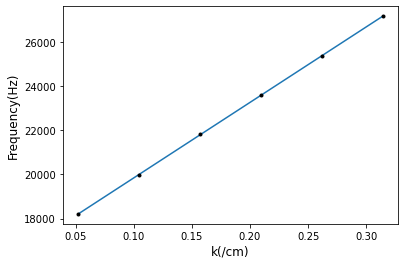

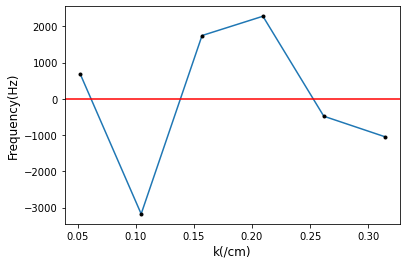

In [5]:
import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize                        # import a specific function from a package: 'optimize' for curve fitting

file_name = 'Dispersion.csv'                           # replace with the name of your csv data file

file_folder = ''                                  # use this if your data file is in the same folder as your python program

data_file = file_folder + file_name
print(data_file)


xdata, ydata, yerr  = np.loadtxt(                 
        data_file,                                # file to read
#        delimiter = '\t',                         # specify delimiting character 
       delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (0, 1, 2),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows.                                                                                                   

def func(x,m,b):                                # Define your fitting function
    return m*x+b                     
 
initialguess = [1,1]                     # initial guess for the parameters of the function func

fit, covariance = optimize.curve_fit(             # call to the fitting routine curve_fit.  Returns optimal values of the fit parameters, and their estimated variance
        func,                                     # function to fit
        xdata,                                    # data for independant variable
        ydata,                                    # data for dependant variable
        initialguess,                             # initial guess of fit parameters
        yerr)                                     # uncertainty in dependant variable

print("offset:",fit[0],"+-",np.sqrt(covariance[0][0]))     #print value and one std error of the first fit parameter
print("offset:",fit[1],"+-",np.sqrt(covariance[1][1]))     #print value and one std error of the second fit parameter
print("Be sure to use the correct number of significant digits in your final answer!!!!!!!!!!!!1!")

##########
# Plotting data and fit
##########

xdatafit=np.linspace(min(xdata), max(xdata), 100) # make lots of xdata for a smooth curve
func_plot=func(xdatafit,*fit)                     # create discrete data set from fitting function

plt.clf()                                         # clear plot figure
plt.plot(xdatafit, func_plot)                     # plot the fit function 
plt.errorbar(xdata, ydata, yerr, fmt='k.')        # plot data with error bars, define format of plot (k=black)
#plt.title('Best Fit Linear Equation')             # plot title
plt.xlabel('k(/cm)',fontsize = 12)                     # label x axis
plt.ylabel('Frequency(Hz)',fontsize = 12)                     # label y axis
#plt.xlim(np.min(xdata),np.max(xdata))             # choose limits of x or y axis 
#plt.ylim(np.min(ydata),np.max(ydata))             # choose limits of x or y axis                                          
plt.savefig("./"+file_name+'DataWithFit.pdf',dpi=300)         # save figure of plot
plt.show()                                        # show plot

##########
# Plotting residuals
##########

func_model=func(xdata,*fit)              # create discrete data set from fitting function
residual = (ydata-func_model)                  # create array of residual data
normresidual = (ydata-func_model)/yerr         #normalize residual data with the uncertainty in each point.  The result is the number of std errors.

plt.clf()   
plt.errorbar(xdata, normresidual, fmt='k.')
plt.plot(xdata, normresidual)  
plt.axhline(y=0.0, color='r', linestyle='-') 
#plt.title('Residual')
plt.xlabel('k(/cm)',fontsize = 12)
plt.ylabel('Frequency(Hz)',fontsize = 12)
plt.savefig("./"+file_name+'Residual.pdf',dpi=300)         # save figure of plot
plt.show()
